<a href="https://colab.research.google.com/github/Alisa-Liang/colab/blob/main/PBPCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#import sys
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/PBP')

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/PBP")

In [ ]:
! pwd

/content/drive/MyDrive/Colab Notebooks/PBP


In [ ]:
"""
Adapt from:
1. https://gist.github.com/vvanirudh/9e30b2f908e801da1bd789f4ce3e7aac
2. "Variational Dropout and the Local Reparameterization Trick" (https://arxiv.org/abs/1506.02557)
3. http://gluon.mxnet.io/chapter18_variational-methods-and-uncertainty/bayes-by-backprop.html
"""
import BNNLayer
import BNN

import torch
import torchvision
import torch.utils.data as Data
from torch.autograd import Variable

In [ ]:
N_Epochs = 15    #设置运行次数
N_Samples = 1      #样本数
LearningRate = 1e-3   #设置学习效率
BatchSize = 100    #设置一组训练所选取的样本数(组数)。
Download_MNIST = True  # download the dataset if you don't already have it

In [ ]:
# Change to whatever directory your data is at
import os.path
#设置数据集的路径。os.path.join：连接两个或更多的路径名组件；os.path.dirname：去掉文件名，返回目录
#dataset_path = os.path.join(os.path.dirname(__file__), 'mnist')  

#从minst数据集上下载训练集
train_set = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=Download_MNIST
)

train_size = train_set.train_data.size()[0]  #得到训练集有多少元素
N_Batch = train_size / BatchSize  #每次执行用到的元素个数

#将数据集进行分组，每组中有600个元素
train_loader = Data.DataLoader(dataset=train_set, batch_size=BatchSize, shuffle=True)

#从minst数据集上下载测试集
test_set = torchvision.datasets.MNIST(
    root='./mnist/',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=Download_MNIST
)

test_size = test_set.test_data.size()[0]  #得到测试集有多少元素

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


/content/drive/MyDrive/Colab Notebooks/PBP/BNNLayer.py:75: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.act(Z) if self.act is not None else Z
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/content/drive/MyDrive/Colab Notebooks/PBP/BNNLayer.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if mode == 'MAP': return self.act(Z_Mean) if self.act is not None else Z_Mean
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been ren

Epoch 0 |  Training Accuracy: 94.1 %
Epoch 0 |  Test Accuracy: 93.9 %
Epoch 1 |  Training Accuracy: 96.0 %
Epoch 1 |  Test Accuracy: 95.6 %
Epoch 2 |  Training Accuracy: 97.0 %
Epoch 2 |  Test Accuracy: 96.2 %
Epoch 3 |  Training Accuracy: 97.5 %
Epoch 3 |  Test Accuracy: 96.7 %
Epoch 4 |  Training Accuracy: 98.0 %
Epoch 4 |  Test Accuracy: 97.2 %
Epoch 5 |  Training Accuracy: 98.4 %
Epoch 5 |  Test Accuracy: 97.4 %
Epoch 6 |  Training Accuracy: 98.5 %
Epoch 6 |  Test Accuracy: 97.4 %
Epoch 7 |  Training Accuracy: 98.7 %
Epoch 7 |  Test Accuracy: 97.6 %
Epoch 8 |  Training Accuracy: 98.9 %
Epoch 8 |  Test Accuracy: 97.7 %
Epoch 9 |  Training Accuracy: 99.0 %
Epoch 9 |  Test Accuracy: 97.6 %
Epoch 10 |  Training Accuracy: 99.2 %
Epoch 10 |  Test Accuracy: 97.8 %
Epoch 11 |  Training Accuracy: 99.3 %
Epoch 11 |  Test Accuracy: 97.8 %
Epoch 12 |  Training Accuracy: 99.5 %
Epoch 12 |  Test Accuracy: 97.9 %
Epoch 13 |  Training Accuracy: 99.4 %
Epoch 13 |  Test Accuracy: 97.9 %
Epoch 14 |  

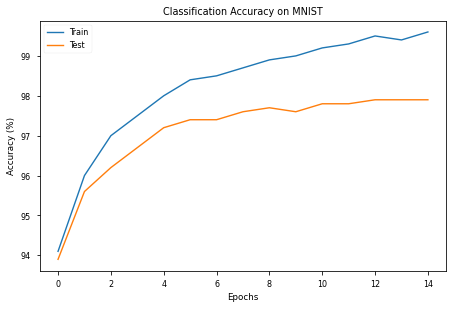

In [ ]:
#损失函数，若预测值和真实值相等，新的指数digits为(pred == true).mean() * 100
compute_accu = lambda pred, true, digits: round((pred == true).mean() * 100, digits)

if __name__ == '__main__':

    # Initialize network  #初始化网络
    bnn = BNN.BNN(BNNLayer.BNNLayer(784, 128, activation='relu', prior_mean=0, prior_rho=-3), BNNLayer.BNNLayer(128, 10, activation='softmax', prior_mean=0, prior_rho=-3))
    optim = torch.optim.Adam(bnn.parameters(), lr=LearningRate)

    # Main training loop   #对训练集和测试集进行循环
    train_accu_lst = []
    test_accu_lst = []
    for i_ep in range(N_Epochs):

        # Training   对数据集进行训练
        for X, Y in train_loader:
            batch_X = Variable(X.view(BatchSize, -1))
            batch_Y = Variable(Y.view(BatchSize, -1))

            kl, log_likelihood = bnn.Forward(batch_X, batch_Y, N_Samples, type='Softmax')

            # Loss and backprop   #损失函数和反向传播
            loss = BNN.BNN.loss_fn(kl, log_likelihood, N_Batch)
            optim.zero_grad()
            loss.backward()
            optim.step()

        # Evaluate on training set  对训练集进行准确率评价
        train_X = Variable(train_set.train_data.view(train_size, -1).type(torch.FloatTensor))
        train_Y = Variable(train_set.train_labels.view(train_size, -1))

        pred_class = bnn.forward(train_X, mode='MAP').data.numpy().argmax(axis=1)
        true_class = train_Y.data.numpy().ravel()

        train_accu = compute_accu(pred_class, true_class, 1)
        print('Epoch', i_ep, '|  Training Accuracy:', train_accu, '%')

        train_accu_lst.append(train_accu)

        # Evaluate on test set      对测试集进行准确率评价
        test_X = Variable(test_set.test_data.view(test_size, -1).type(torch.FloatTensor))
        test_Y = Variable(test_set.test_labels.view(test_size, -1))

        pred_class = bnn.forward(test_X, mode='MAP').data.numpy().argmax(axis=1)
        true_class = test_Y.data.numpy().ravel()

        test_accu = compute_accu(pred_class, true_class, 1)
        print('Epoch', i_ep, '|  Test Accuracy:', test_accu, '%')

        test_accu_lst.append(test_accu)

    # Plot
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-paper')                                                                                                 

    plt.title('Classification Accuracy on MNIST')
    plt.plot(train_accu_lst, label='Train')
    plt.plot(test_accu_lst, label='Test')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Epochs')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
